In [ ]:
%matplotlib inline


# Image Deconvolution


In this example, we deconvolve a noisy version of an image using Wiener
and unsupervised Wiener algorithms. This algorithms are based on
linear models that can't restore sharp edge as much as non-linear
methods (like TV restoration) but are much faster.

Wiener filter
-------------
The inverse filter based on the PSF (Point Spread Function),
the prior regularisation (penalisation of high frequency) and the
tradeoff between the data and prior adequacy. The regularization
parameter must be hand tuned.

Unsupervised Wiener
-------------------
This algorithm has a self-tuned regularisation parameters based on
data learning. This is not common and based on the following
publication [1]_. The algorithm is based on a iterative Gibbs sampler that
draw alternatively samples of posterior conditional law of the image,
the noise power and the image frequency power.

.. [1] François Orieux, Jean-François Giovannelli, and Thomas
       Rodet, "Bayesian estimation of regularization and point
       spread function parameters for Wiener-Hunt deconvolution",
       J. Opt. Soc. Am. A 27, 1593-1607 (2010)



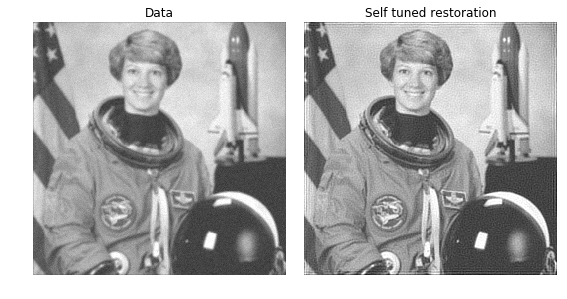

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

# astronaut , chelsea ,moon ,immunohistochemistry , horse ,coffee ,logo ,coins ,clock ,checkerboard
astro = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * np.random.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)
plt.gray()

ax[0].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()